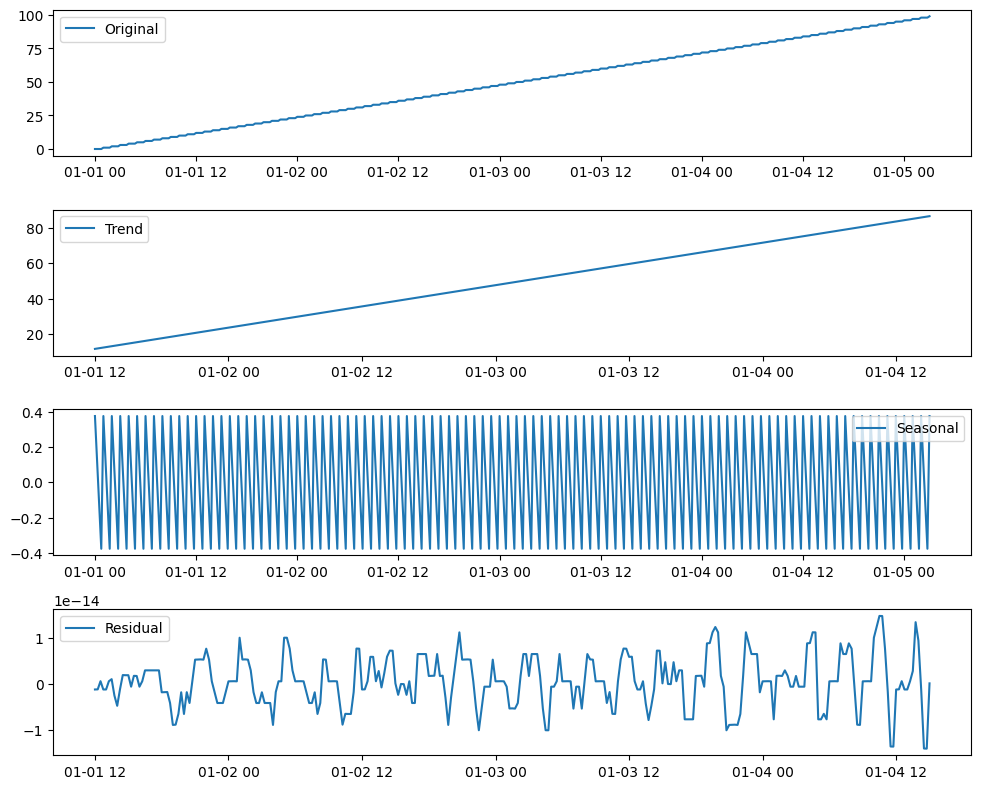

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Sample time series data (replace this with your own data)
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='H'),
    'value': range(100)
}

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Resample the data to 15-minute frequency
df_15min = df.resample('15T').ffill()  # Forward fill missing values if any

# Perform seasonal decomposition
result = seasonal_decompose(df_15min['value'], model='additive', period=96)  # 96 periods for a daily seasonality

# Plot the original data, trend, seasonal, and residual components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df_15min, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()
